# Apple Stock Market (EDA / Machine learning)

In [3]:
!pip install pmdarima

In [57]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [58]:
df = pd.read_csv(r'C:\Users\USER\Downloads\New folder\AAPL_historical_data.csv')
df.head(5)

,Date,Open,High,Low,Close
0,1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834
1,1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678
2,1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802
3,1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951
4,1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    11094 non-null  object 
 1   Open    11094 non-null  float64
 2   High    11094 non-null  float64
 3   Low     11094 non-null  float64
 4   Close   11094 non-null  float64
dtypes: float64(4), object(1)
memory usage: 433.5+ KB


In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,11094.0,23.236654,49.129620,0.038245,0.242896,0.442782,18.083088,247.960007
High,11094.0,23.484468,49.645173,0.038245,0.248067,0.451501,18.278464,250.800003
Low,11094.0,23.001626,48.654514,0.037815,0.237920,0.435876,17.904287,246.259995
Close,11094.0,23.254564,49.178271,0.037815,0.242953,0.444634,18.107803,248.130005


## Data preprocessing

In [61]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Date     0.0
Open     0.0
High     0.0
Low      0.0
Close    0.0
dtype: float64

Duplicate Rows (%):
0.0


In [62]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)
outliers

,Date,Open,High,Low,Close
0,2018-05-11 00:00:00-04:00,44.932077,45.067234,44.448348,44.718666
1,2018-06-04 00:00:00-04:00,45.441877,45.863952,45.373114,45.486931
2,2018-06-05 00:00:00-04:00,45.780961,45.987255,45.612603,45.837868
3,2018-06-06 00:00:00-04:00,45.913756,46.020460,45.508277,45.996746
4,2018-06-07 00:00:00-04:00,46.034677,46.048903,45.607858,45.873436
...,...,...,...,...,...
6142,2024-12-09 00:00:00-05:00,241.830002,247.240005,241.750000,246.750000
6143,2024-12-10 00:00:00-05:00,246.889999,248.210007,245.339996,247.770004
6144,2024-12-11 00:00:00-05:00,247.960007,250.800003,246.259995,246.490005
6145,2024-12-12 00:00:00-05:00,246.889999,248.740005,245.679993,247.960007


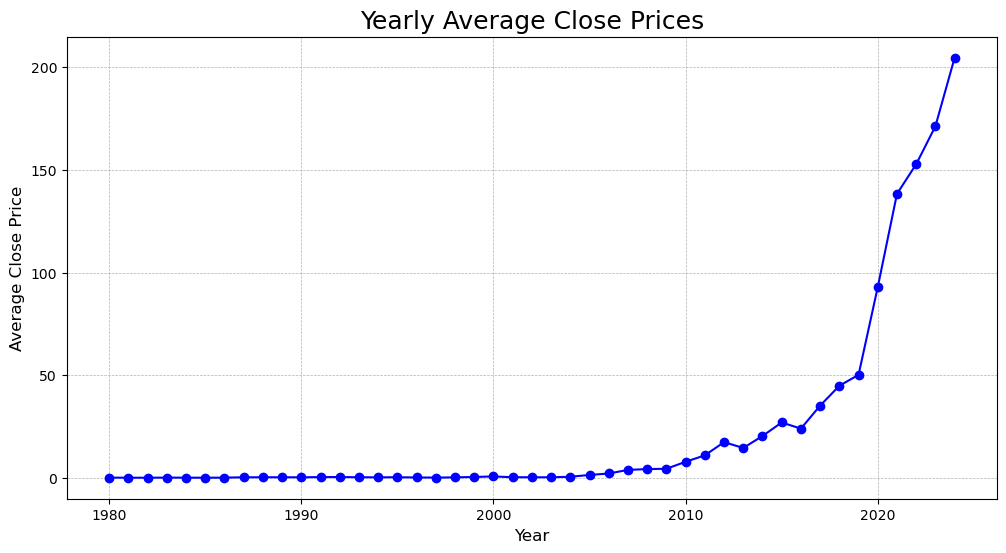

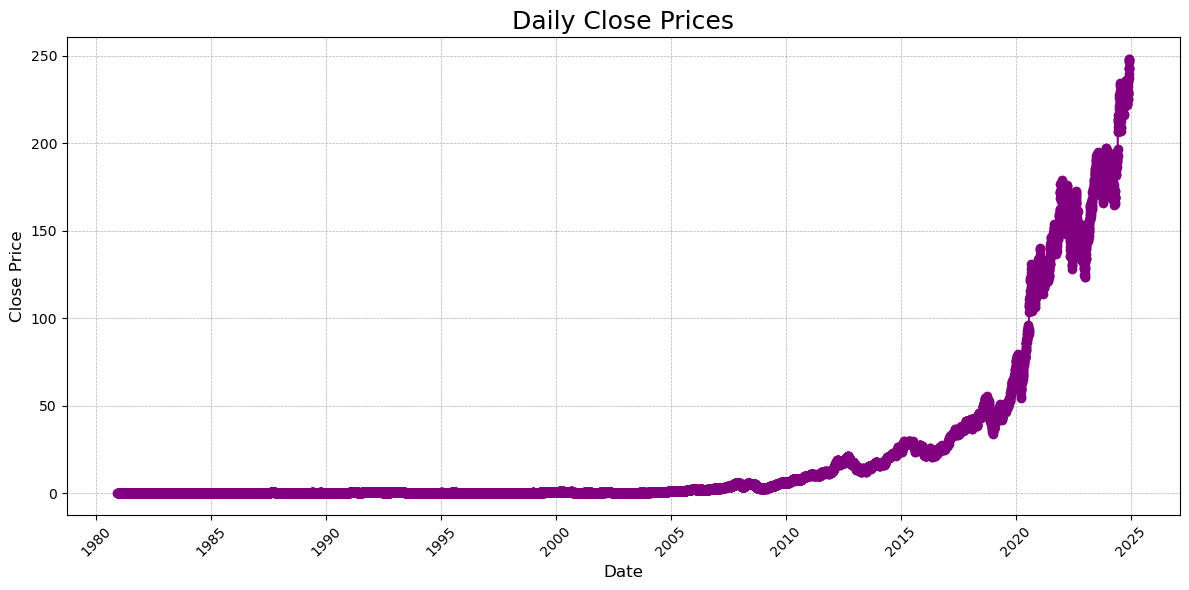

In [69]:
df["Date"] = pd.to_datetime(df["Date"], utc=True)  
df["Date"] = df["Date"].dt.tz_convert(None)  

df["Year"] = df["Date"].dt.year
yearly_data = df.groupby("Year")["Close"].mean()
daily_data = df.groupby("Date")["Close"].mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data.values, marker="o", color="blue")
plt.title("Yearly Average Close Prices", fontsize=18)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Close Price", fontsize=12)
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values, marker="o", color="purple")
plt.title("Daily Close Prices", fontsize=18)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

## Comparison of regression model performance

In [8]:
X = df[['Open', 'High', 'Low']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, tol=1e-4),  
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "KNN": KNeighborsRegressor(n_neighbors=3),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Bayesian Ridge": BayesianRidge(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  

    mse = mean_squared_error(y_test, y_pred)  
    r2 = r2_score(y_test, y_pred)  
    
    return mse, r2

In [9]:
results = {}

for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {"MSE": mse, "R²": r2}

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R²", ascending=False)

results_df

,MSE,R²
Polynomial Regression,0.102884,0.999958
Linear Regression,0.104546,0.999957
Bayesian Ridge,0.104547,0.999957
MLP Regressor,0.157211,0.999936
KNN,0.173079,0.999929
Random Forest,0.184031,0.999925
ElasticNet,0.199721,0.999918
Decision Tree,0.320758,0.999868
XGBoost,0.904137,0.999629
SVR,11.670635,0.995213


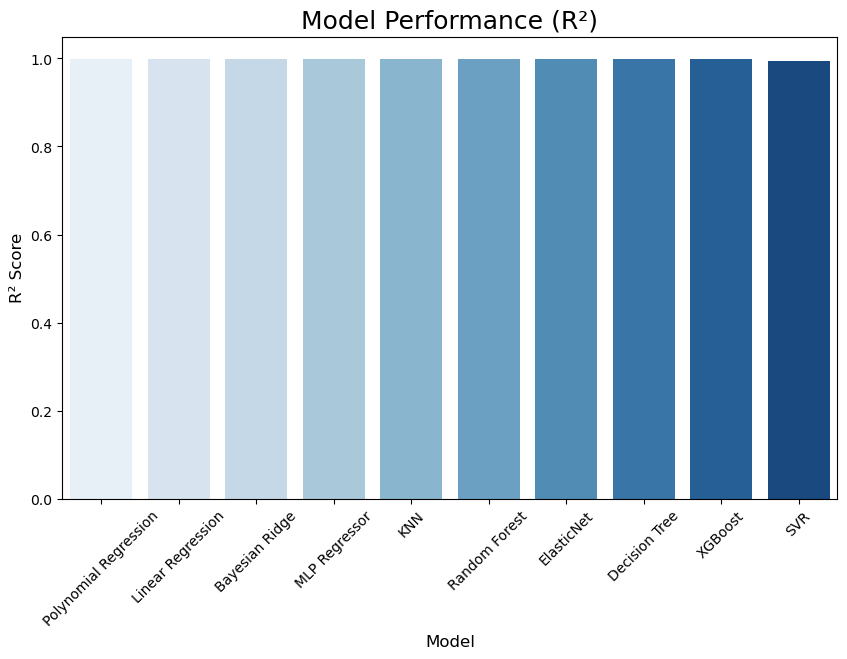

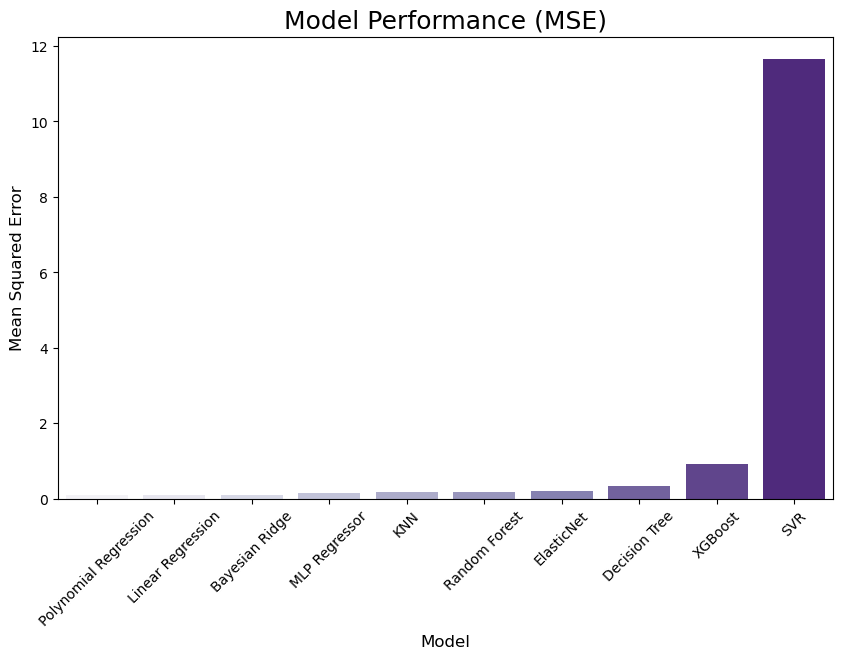

Best Model:
MSE    0.102884
R²     0.999958
Name: Polynomial Regression, dtype: float64


In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="R²", data=results_df, palette="Blues")
plt.title("Model Performance (R²)", fontsize=18)
plt.xlabel("Model", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="MSE", data=results_df, palette="Purples")
plt.title("Model Performance (MSE)", fontsize=18)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.xticks(rotation=45)
plt.show()

best_model = results_df.loc[results_df["R²"].idxmax()]
print("Best Model:")
print(best_model)


## Conclusion

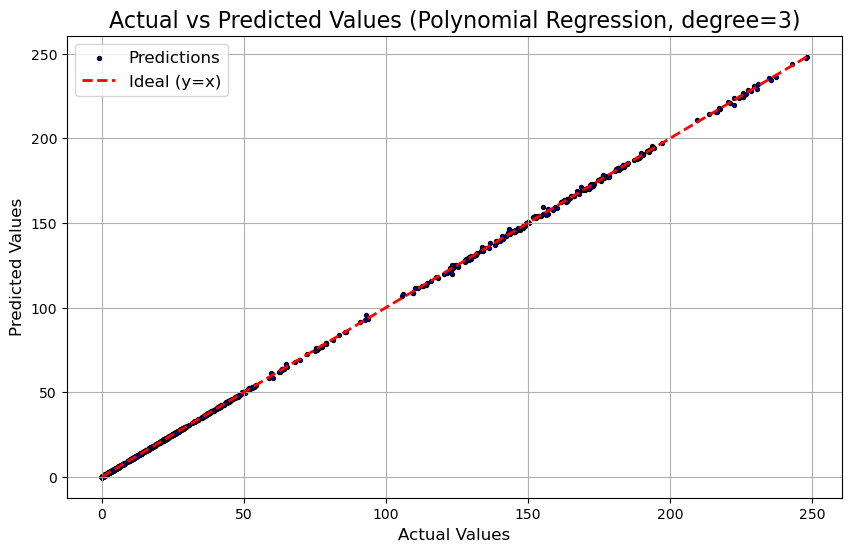

Polynomial Regression (degree=3) Result: MSE = 0.09744954469825293, R² = 0.9999600295188078


In [67]:
degree = 3
poly = PolynomialFeatures(degree=degree)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', s=8, edgecolor='black', label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal (y=x)')

plt.title(f'Actual vs Predicted Values (Polynomial Regression, degree={degree})', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Polynomial Regression (degree={degree}) Result: MSE = {mse}, R² = {r2}')